# Setup


## Importing Data Analysis Libraries

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Useful Constants

In [29]:
DATASETS = ['dataset/TCGA_GBM_LGG_Mutations_all.csv', './dataset/TCGA_InfoWithGrade.csv']
GRADE = ['LGG','GBM']
PROJECT = ['TCGA-GBM', 'TCGA-GBM']
GENDER = ['Male', 'Female']
PRIMARY_DIAGNOSIS = ['Oligodendroglioma, NOS', 'Mixed glioma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic', 'Oligodendroglioma, anaplastic', 'Glioblastoma']
RACE = ['White', 'Black or African American', 'Asian', 'American Indian or Alaska Native']
GENES = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
MUTATION = ['Not Mutated', 'Mutated']

# Dataset
> Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.
> In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.
> The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading process to improve performance and reduce costs
> -- <cite>https://www.kaggle.com/datasets/vinayjose/glioma-grading-clinical-and-mutation-features/data</cite>

By analyzing both provided datasets:
- **TCGA_GBM_LGG_Mutations_all.csv** : Values have string format
-  **TCGA_InfoWithGrade** : Values are encoded as integers
we decided to create a set of variables that depict the meaning of each value from each column of the `TCGA_InfoWithGrade.csv` file. We will mostly be using this dataset as its data is presented in an easier way to manipulate. 

## Dataset Pre-processing
Due to the vast extensity of the provided dataset, we decided to remove every row that presentes at least one missing value. This way, we can ensure that the dataset is clean and ready to be used for the analysis.

In [30]:
df_all = pd.read_csv(DATASETS[0])
df_all.replace(['--', 'not reported'], pd.NA, inplace=True)
df_all.dropna(inplace=True)

df_with_grade =  pd.read_csv(DATASETS[1])

## Distributions

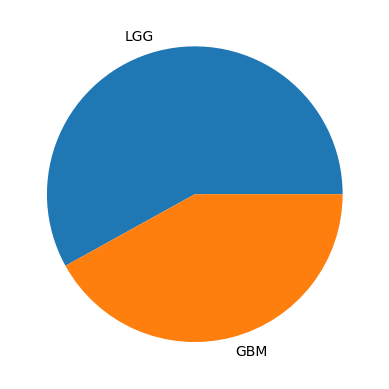

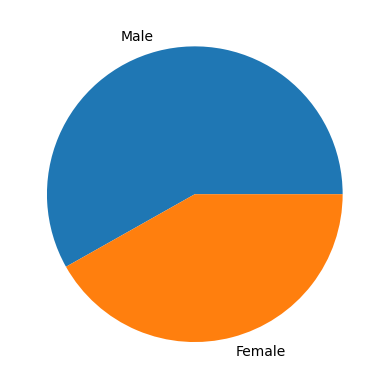

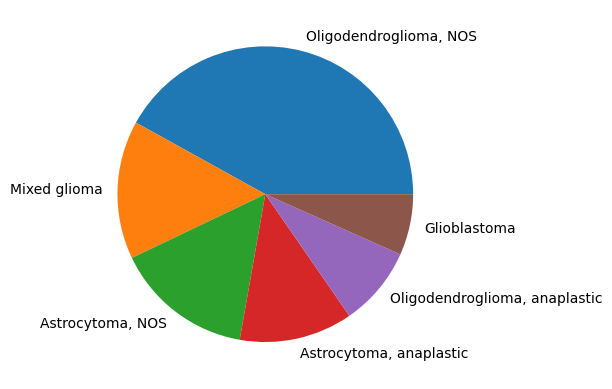

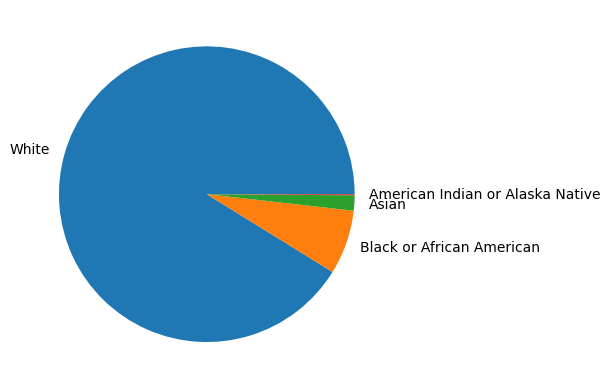

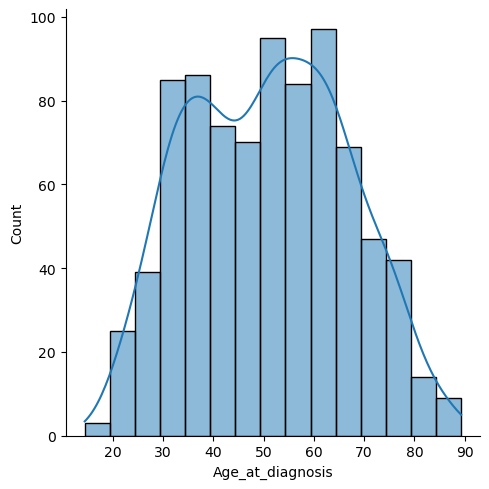

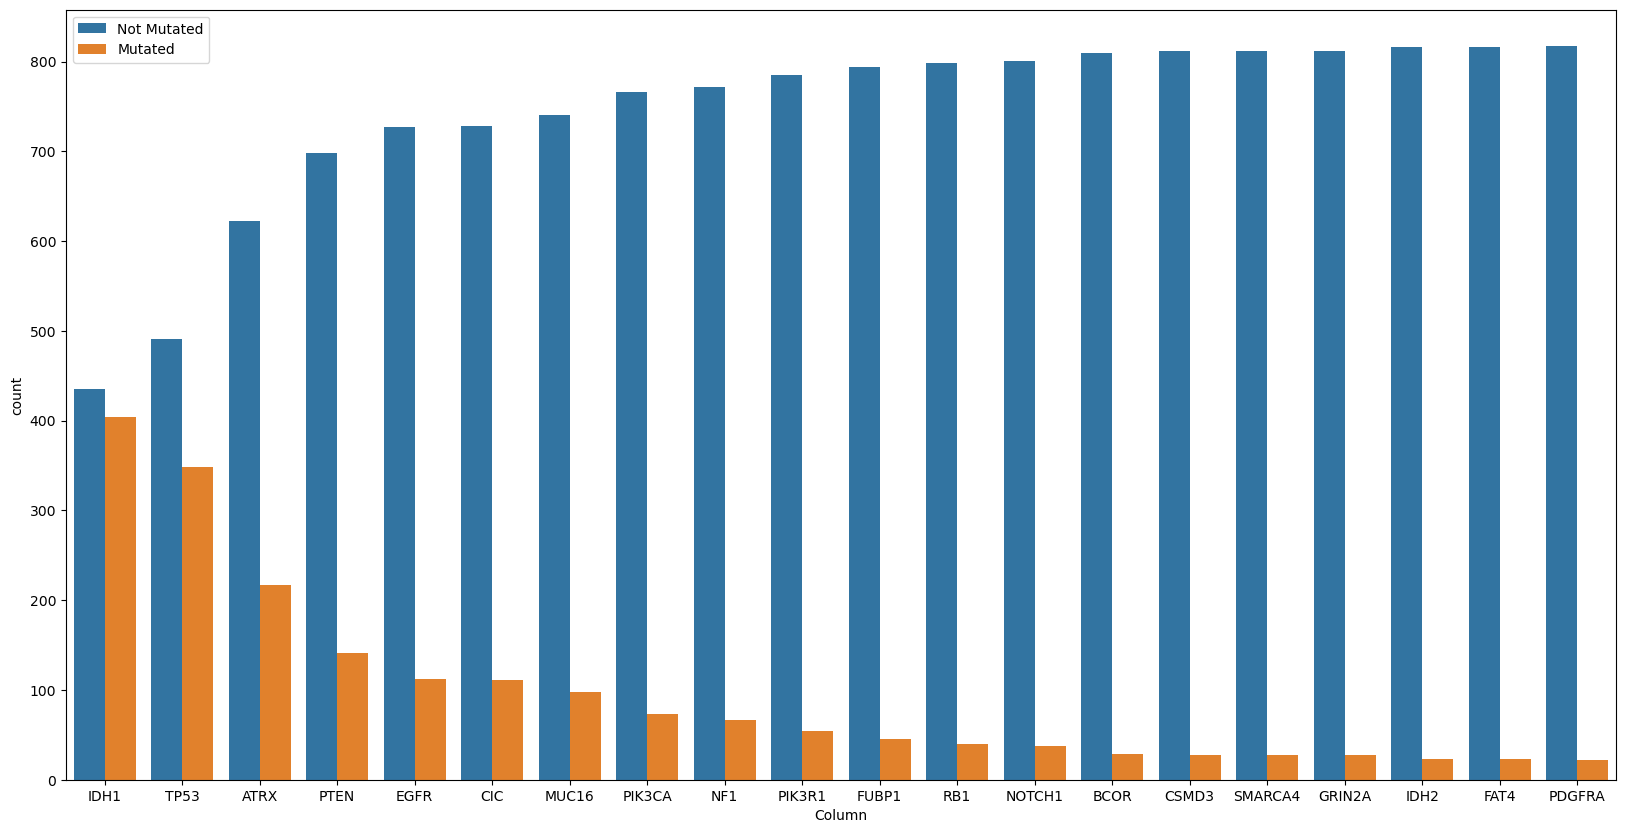

In [31]:
plt.figure()
plt.pie(
    x=df_all['Grade'].value_counts(),
    labels=GRADE,
) 

plt.figure()
plt.pie(
    x= df_all['Gender'].value_counts(),
    labels=GENDER,
) 

plt.figure()
plt.pie(
    x= df_all['Primary_Diagnosis'].value_counts(),
    labels=PRIMARY_DIAGNOSIS,
)

plt.figure()
plt.pie(
    x= df_all['Race'].value_counts(),
    labels=RACE,
)

sns.displot(df_with_grade, kde=True, x='Age_at_diagnosis')
# sns.displot(df_with_grade, kde=True, x='Age_at_diagnosis', hue='Grade')

plt.figure(figsize=(20, 10))
melted_df = df_with_grade[GENES].melt(var_name='Column', value_name='Value')
sns.countplot(data=melted_df, x='Column', hue='Value')
plt.legend(MUTATION)

plt.show()

# Supervised Learning



### Importing Libraries

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import svm

### Training the dataset

In [33]:
X = df_with_grade.drop('Grade', axis=1)
y = df_with_grade['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistical Regression (LR)
The first model we will be using is the `Logistical Regression`. This model is a classification model that is used to predict the probability of a target variable. In this case, we will be using it to predict the type of glioma a patient has (`LGG` or `GBM`) based on the clinical and molecular features provided in the dataset.

### Evaluating the model

In [34]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(f"Model Score: {lg_model.score(X_test, y_test)*100:.2f}%")

Model Score: 86.90%


### Confusion Matrix
The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. 
To understand the confusion matrix, we need to understand the following terms:
- `True Positive (TP)` (*top-left*): The number of correct predictions that an instance is positive.
- `True Negative (TN)` (*top-right*): The number of correct predictions that an instance is negative.
- `False Positive (FP)` (*bottom-left*): The number of incorrect predictions that an instance is positive.
- `False Negative (FN)` (*bottom-right*): The number of incorrect predictions that an instance is negative.

Having higher values of `TP` and `TN` and lower values of `FP` and `FN` is the goal of any classification model.

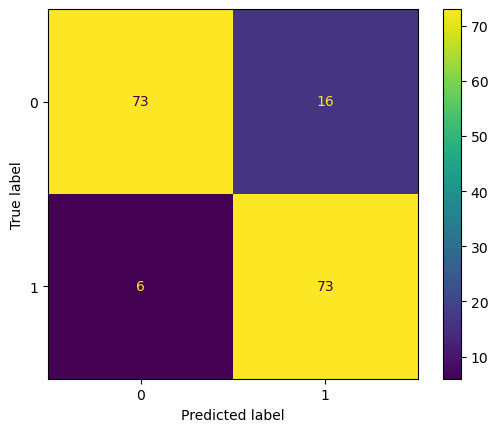

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Classification Report
The classification report is a text summary of the precision, recall, F1 score, and support for each class.

#### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. The question that this metric answers is of all patients that have glioma, how many actually have glioma?

#### Recall
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The question that this metric answers is of all the patients that have glioma, how many did we predict correctly?

#### F1 Score
The F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both false positives and false negatives.

#### Support
Support is the number of actual occurrences of the class in the specified dataset.

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        89
           1       0.82      0.92      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.88      0.87      0.87       168



### Coefficient Interpretation
We use the `coef_` attribute of the logistic regression model to get the coefficients of each feature. The coefficients help us understand the weight of each feature in the model:
- The more positive the coefficient is, the more likely it is to be a `GBM` case.
- The more negative the coefficient is, the more likely it is to be a `LGG` case.
- The closer the coefficient is to zero, the less impact it has on the model.

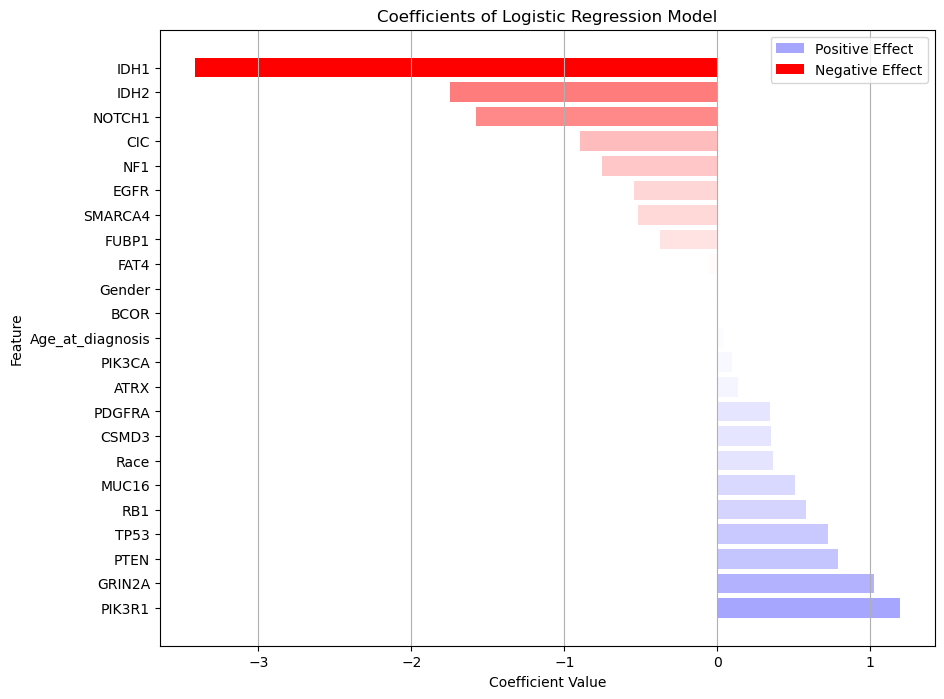

In [37]:
coefficients = dict(zip(X.columns, lg_model.coef_[0]))
sorted_coefficients = dict(sorted(coefficients.items(), key=lambda item: item[1], reverse=True))

features = list(sorted_coefficients.keys())                         # List of Variables
coef_values = list(sorted_coefficients.values())                    # Weight of each variable
colors = ['red' if coef < 0 else 'blue' for coef in coef_values]    
intensities = np.abs(coef_values) / np.max(np.abs(coef_values)) 

plt.figure(figsize=(10, 8))
bars = plt.barh(features, coef_values, color=colors)

for bar, intensity in zip(bars, intensities):
    bar.set_alpha(intensity)

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.grid(axis='x')
plt.legend(handles=[bars[0], bars[-1]], labels=['Positive Effect', 'Negative Effect'])
plt.show()

## Support Vector Machine (SVM)
The second model we will be using is the `Support Vector Machine`. This model is a classification model that is used to separate data points into classes by finding the hyperplane that best divides the data points into classes. In this case, we will be using it to predict the type of glioma a patient has (`LGG` or `GBM`) based on the clinical and molecular features provided in the dataset.

### Evaluating the model

In [38]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

## K Nearest Neighbors (KNN)

## Random Forest (RF)

## AdaBoost

## Neural Network (NN)